<a href="https://colab.research.google.com/github/paascorb/RompecabezasPCD/blob/main/TrabajoPCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabajo Rompecabezas por Pablo Ascorbe

In [1]:
pip install pygame

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import numpy as np
import matplotlib.pylab as plt
import random
import pygame
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow
from google.colab import output
import time 
import os, sys
os.environ['SDL_VIDEODRIVER']='dummy'

Primero necesitamos un método que divida una imagen en las filas y columnas deseadas:

In [3]:
def dividir_imagen(imagen, filas, columnas):
  res = dividir_columnas( dividir_filas(imagen, filas), columnas)
  return [item for sublist in res for item in sublist]

In [4]:
def dividir_filas(imagen, filas):
  #Guardamos la dimension de las filas y calculamos el resto
  shape_0 = imagen.shape[0]
  restoFilas = shape_0%filas
  #Si la división no es exacta, significa que necesitamos rellenar con píxeles
  #negros, a través de la diferencia entre el resto y el número de filas.
  if restoFilas != 0:
    dif = filas - restoFilas
    shape_0 += dif
    #Si además esa diferencia no es par, necesitamos añadirle a una porción
    #más negros que a otra
    if dif%2 != 0:
      arriba = dif//2
      abajo = dif-arriba
    else:
      arriba, abajo = dif//2, dif//2
    #Con esto resuelto creamos las filas de negros, añadimos la imagen y 
    #terminamos de rellenar con negros.
    res = np.zeros((arriba, imagen.shape[1], imagen.shape[2]), dtype=int)
    res = np.append(res, np.copy(imagen), axis=0)
    res = np.append(res, np.zeros((abajo, imagen.shape[1], imagen.shape[2]), dtype=int), axis=0)
  else:
    res = np.copy(imagen)
  #Calculamos cuantas filas entran en cada porción
  cocienteFilas = shape_0//filas
  #comprobamos si tiene sentido rebanar
  if cocienteFilas == shape_0:
    return res
  else:
    #Y rebanamos
    return np.split(res, list(range(cocienteFilas, (cocienteFilas*filas)+1, cocienteFilas)))[:-1]

In [5]:
#El funcionamiento es identico a filas, pero en este caso es ir aplicándolo 
#por columnas a cada elemento de nuestra lista de filas.
def dividir_columnas(listaFilas, columnas):
  shape_1 = listaFilas[0].shape[1]
  restoColumnas = shape_1%columnas
  if restoColumnas != 0:
    dif = columnas - restoColumnas
    shape_1 += dif
    if dif%2 != 0:
      arriba = dif//2
      abajo = dif-arriba
    else:
      arriba, abajo = dif//2, dif//2
    aux = []
    for elem in listaFilas:
      res = np.zeros((elem.shape[0], arriba, elem.shape[2]), dtype=int)
      res = np.append(res, np.copy(elem), axis=1)
      aux.append(np.append(res, np.zeros((elem.shape[0], arriba, elem.shape[2]), dtype=int), axis=1))
    listaFilas = aux
  cocienteColumnas = shape_1//columnas
  if cocienteColumnas == shape_1:
    return listaFilas
  else:
    return [np.split(listaFilas[i], list(range(cocienteColumnas, (cocienteColumnas*columnas)+1, cocienteColumnas)), axis=1)[:-1] for i in range(len(listaFilas))]

In [6]:
import skimage

lista = dividir_imagen(skimage.data.coffee(), 10, 10)

Creamos una función auxiliar para mostrar los resultados:

In [7]:
def mostrar_casillas(lista, filas, columnas):
  fig = plt.figure(figsize=(8, 8))
  for i in range(0, filas*columnas):
    fig.add_subplot(filas,columnas,i+1)
    plt.imshow(lista[i])
  plt.show()

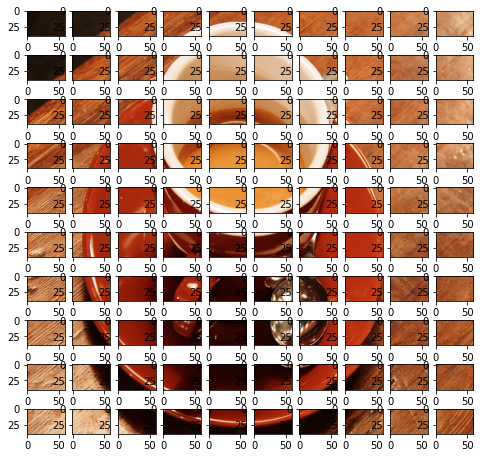

In [8]:
#Vemos que funciona correctamente:
mostrar_casillas(lista, 10, 10)

Ahora necesitamos un método que desordene nuestrás imágenes para el rompecabezas:

In [9]:
def desordenar_imagenes(listaImagenes):
  return random.shuffle(listaImagenes)

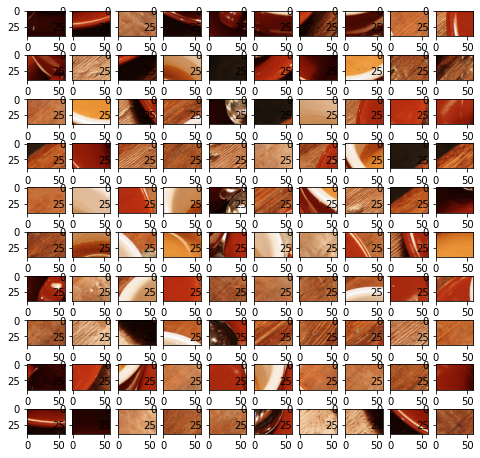

In [11]:
desordenar_imagenes(lista)
mostrar_casillas(lista, 10, 10)

Necesitamos crear el hueco con el que iremos jugando:

In [12]:
def crear_hueco(lista):
  elem = random.choice(lista)
  ind = next((i for i, val in enumerate(lista) if np.all(val == elem)), -1)
  elem.fill(0)
  lista[ind] = elem
  return lista

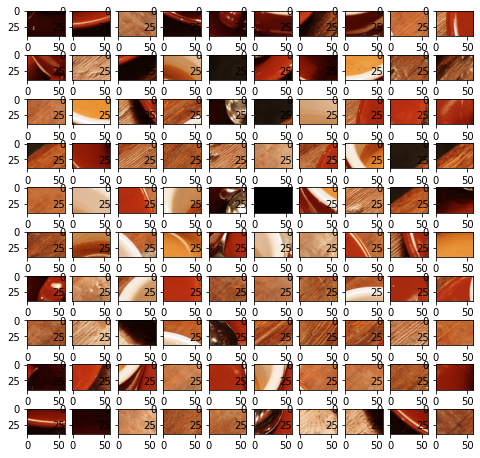

In [13]:
lista = crear_hueco(lista)
mostrar_casillas(lista, 10, 10)

Ahora implementamos el cambio entre casillas.

In [14]:
def intercambiar_casillas(lista, pos1, pos2):
  lista[pos1], lista[pos2] = lista[pos2], lista[pos1]

Hacemos la interfaz gráfica

Esta es una opción de recoger en cuántas filas y columnas se desea partir la imagen.

In [32]:
filas = 10 #@param {type:"number"}
columnas = 10 #@param {type:"number"}

Y esta es otra, lo que el usuario prefiere, en este caso tú, Laureano.

In [36]:
filas = int(input('Introduzca el número de filas: '))
columnas = int(input('Introduzca el número de columnas: '))

Introduzca el número de filas: 10
Introduzca el número de columnas: 10


In [37]:
imagen = skimage.data.coffee()

Generamos una serie de variables auxiliares para la interfaz:

In [44]:
W, H = imagen.shape[0], imagen.shape[1]
F, C = filas, columnas
S_S = W//C

Guardamos cada matriz de numpy en imagenes que usaremos para la interfaz:

In [43]:
for i,elem in enumerate(lista):
  img = Image.fromarray(elem, 'RGB')
  img.save(f"casilla{i}.png")

In [45]:
imagenes = []

for i in range(len(lista)):
  imagenes.append(pygame.image.load(f"casilla{i}.png"))

In [50]:
im_0_rct = imagenes[1].get_rect(center=(0,0))

In [ ]:
class Tablero:

  def __init__(self):
    self.board = []
  
  def dibujar_puzle(self, screen):
    for elem in lista:
      

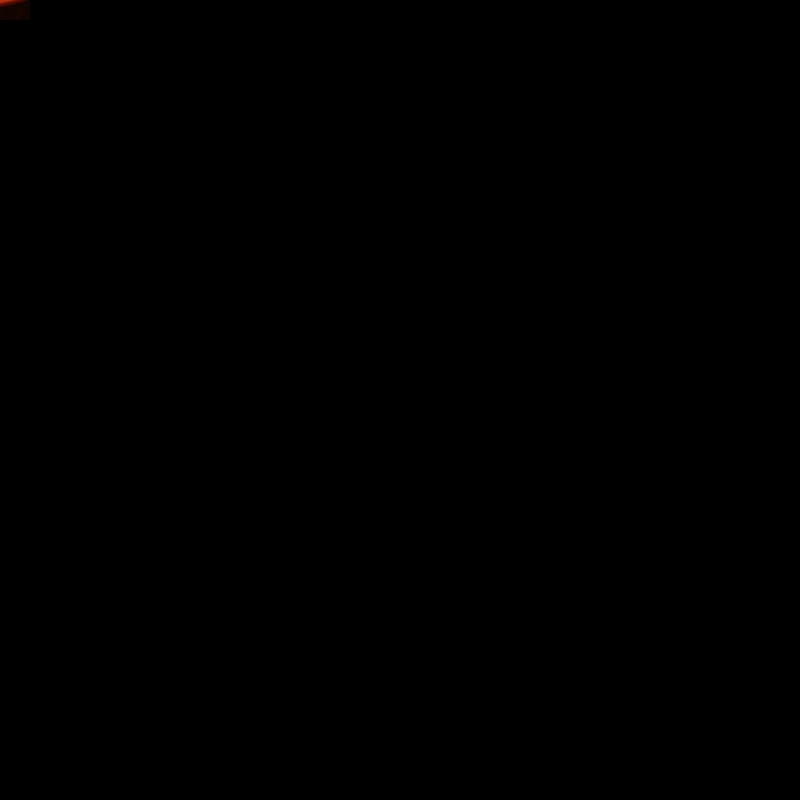

KeyboardInterrupt: ignored

In [51]:
pygame.init()
pygame.display.set_caption("Trabajo de PCD")
screen = pygame.display.set_mode((800, 800))
clock = pygame.time.Clock()
run = True

while run:
  clock.tick(60)
  for event in pygame.event.get():
    if event.type == pygame.QUIT:
                        done = True
        
  for i in range(len(lista)):
    x,y = grid_locations[i]
    

  pygame.display.flip()

  #convert image so it can be displayed in OpenCV
  view = pygame.surfarray.array3d(screen)

  #  convert from (width, height, channel) to (height, width, channel)
  view = view.transpose([1, 0, 2])

  #  convert from rgb to bgr
  img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)

  #Display image, clear cell every 0.5 seconds
  cv2_imshow(img_bgr)
  time.sleep(600)
  output.clear()

In [ ]:
W, H = 800, 800
R, C = 8, 8
S_S = W//C
WHITE = (255,255,255)
BLACK = (0,0,0)
BLUE = (0,0,255)
RED = (255,0,0)

win = pygame.display.set_mode((W,H))
pygame.display.set_caption("Trabajo de PCD")

In [ ]:
run = True
clock = pygame.time.Clock()

while run:
  clock.tick(60)

  for event in pygame.event.get():
    if event.type == pygame.QUIT:
      run = False

  pygame.quit()

In [18]:
pygame.init()
pygame.display.set_caption("Trabajo de PCD")
TAMAÑO = 11
TAMAÑO_CELDA = 64
TAMAÑO_BORDE = 4
TAMAÑO_LETRA = 16
TAMAÑO_ESTADO = TAMAÑO_LETRA*2+5
WHITE = (255,255,255)
BLACK = (0,0,0)
BLUE = (0,0,255)
RED = (255,0,0)
canvas = pygame.display.set_mode((TAMAÑO*TAMAÑO_CELDA+(TAMAÑO-1)*TAMAÑO_BORDE, TAMAÑO*TAMAÑO_CELDA+(TAMAÑO-1)*TAMAÑO_BORDE+TAMAÑO_ESTADO))
canvas.fill(WHITE)
i = 1
while (i < TAMAÑO):
    pygame.draw.line(canvas, BLACK, (i * TAMAÑO_CELDA + (i-1) * TAMAÑO_BORDE + 1, 0), (i * TAMAÑO_CELDA + (i-1) * TAMAÑO_BORDE + 1, TAMAÑO*TAMAÑO_CELDA+(TAMAÑO-1)*TAMAÑO_BORDE - 1), TAMAÑO_BORDE)
    i += 1
i = 1
while (i < TAMAÑO):
    pygame.draw.line(canvas, BLACK, (0, i * TAMAÑO_CELDA + (i-1) * TAMAÑO_BORDE + 1), (TAMAÑO*TAMAÑO_CELDA+(TAMAÑO-1)*TAMAÑO_BORDE - 1, i * TAMAÑO_CELDA + (i-1) * TAMAÑO_BORDE + 1), TAMAÑO_BORDE)
    i += 1
pygame.display.update()

Implementamos que el usuario pueda escoger cualquier imagen: